# Volume Weighted Average Electricity Prices
Data source: https://www.aer.gov.au/industry/registers/charts/annual-volume-weighted-average-30-minute-prices-regions

In [11]:
import pandas as pd
import seaborn as sns
from datetime import datetime
df = pd.read_csv(f'~/PycharmProjects/ZZSC9020-Group-M/data/Australia/AER_Spot prices_Annual.csv')
# df.columns = [c.lower() for c in df.columns]
df.columns = ['financial_year', 'qld', 'nsw', 'vic', 'sa', 'tas', 'snowy']

# Dates are in mixed format
def parse_date(value: str):
    try:
        result = datetime.strptime(value, '%d/%m/%Y %H:%M')
    except ValueError:
        result = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
    return result

def fin_year_to_date(value: str):
    return datetime(int(value[:4]) + 1, 1, 1)

# df['datetime'] = df['datetime'].apply(parse_date)
df['quarter'] = df['financial_year'].apply(fin_year_to_date)
df = df.drop(['financial_year', 'tas', 'snowy'], axis=1).set_index('quarter').drop('2024-01-01').reset_index()
df

,quarter,qld,nsw,vic,sa
0,1999-01-01,60,25,27,54
1,2000-01-01,49,30,28,69
2,2001-01-01,45,41,49,67
3,2002-01-01,38,38,33,34
4,2003-01-01,41,37,30,33
5,2004-01-01,31,37,27,39
6,2005-01-01,31,46,29,39
7,2006-01-01,31,43,36,44
8,2007-01-01,57,67,61,59
9,2008-01-01,58,44,51,101


<Axes: xlabel='quarter', ylabel='price'>

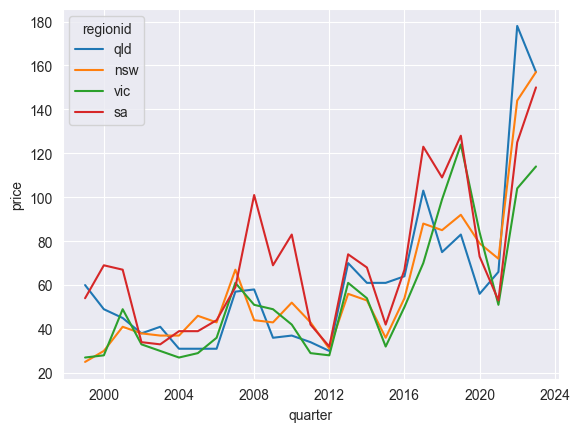

In [22]:
df_stacked = df.set_index('quarter').stack().reset_index()
df_stacked.columns = ['quarter', 'regionid', 'price']
sns.set_style("darkgrid")
sns.lineplot(data=df_stacked, x='quarter', y='price', hue='regionid')

In [21]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
df_quarter = pd.DataFrame({'quarter': [datetime(2015, 1, 1) + relativedelta(months=n) for n in range(0, 85, 3)]})
df_quarter
df_quarter = pd.merge(df_quarter, df, how='left', on='quarter')
df_quarter = df_quarter.interpolate(method='linear', limit_direction='forward')
df_quarter['electricity_price'] = df_quarter.mean(axis=1, numeric_only=True)
df_quarter = df_quarter[['quarter', 'electricity_price']]
df_quarter.to_csv('../data/transformed/electricity_prices.csv', index=False)
df_quarter

,quarter,electricity_price
0,2015-01-01,42.7500
1,2015-04-01,46.7500
2,2015-07-01,50.7500
3,2015-10-01,54.7500
4,2016-01-01,58.7500
5,2016-04-01,68.0625
6,2016-07-01,77.3750
7,2016-10-01,86.6875
8,2017-01-01,96.0000
9,2017-04-01,95.0000


<Axes: xlabel='quarter', ylabel='electricity_price'>

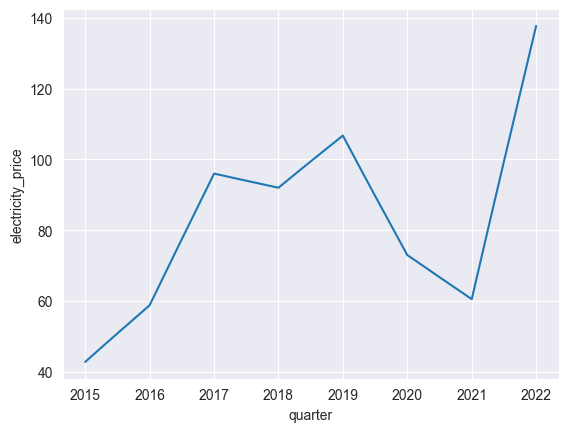

In [23]:
sns.lineplot(data=df_quarter, x='quarter', y='electricity_price')